# Problem Set 1

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).

In [3]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:      7.34.0 (need at least 1.0)
Numpy version:        1.21.6 (need at least 1.7.1)
SciPy version:         1.7.3 (need at least 0.12.0)
Pandas version:        1.3.5 (need at least 0.11.0)
Maplotlib version:     3.5.3 (need at least 1.2.1)
Scikit-Learn version:  1.0.2 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- *Person 1*
- *Person 2*
- ...

---

## Introduction to the assignment

For this assignment, you will be using the [California Housing Prices Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! We'll be coming back to this dataset repeatedly throughout the semester. Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [4]:
from sklearn.datasets import fetch_california_housing
cal_data = fetch_california_housing()

The following commands will provide some basic information about the data:

In [5]:
print(cal_data.DESCR)
print(cal_data.keys())
print(cal_data.feature_names)
print(cal_data.data.shape)
print(cal_data.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

The following commands will put together the features and target into a pandas dataframe: 

In [6]:
cal_df = pd.DataFrame(
    data=cal_data.data,
    columns=cal_data.feature_names
)
cal_df['MedHouseVal'] = cal_data['target']

---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: What is the datatype of each variable?
 - 1.1.3: Does the dataset contain any missing values?
 - 1.1.4: How would you interpret the row index value?

In [29]:
# Your code here
print(f"1.1.1: The dataset has {len(cal_df)} observations and {len(cal_df.columns)} variables.")
print("\n")

print(f"1.1.2: The datatypes of each variable are:")
print(cal_df.dtypes)
print("\n")

print("1.1.3:  There are " + str(len(cal_df.dropna()) - len(cal_df)) + " missing values in the dataset.")

1.1.1: The dataset has 20640 observations and 9 variables.


1.1.2: The datatypes of each variable are:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


1.1.3:  There are 0 missing values in the dataset.


*Provide your answers below:*

 - 1.1.1: The dataset has 20640 observations and 9 variables.
 - 1.1.2: All variables are np.float64
 - 1.1.3: There are no missing values
 - 1.1.4: The index is an enumeration of the 1990 U.S.Census block groups in California.

### 1.2: Answer some basic questions
 - 1.2.1: What is the average population per block group? What was California's total population in 1990 according to the Census?  
 - 1.2.2: What are the median house values in California's block groups with the lowest and highest populations? 
 - 1.2.3: Suggest 5 block groups that are likely to be vacation resorts. Do a quick Google search to validate your results.
 - 1.2.4: How many census block groups are west of the city of Berkeley (lat: 37.871666, long: -122.272781)?
 - 1.2.5: What fraction of block groups have an average number of household members greater or equal to 10?

In [89]:
# Your code here

print(f"1.2.1: The average population in a block group is {round(cal_df['Population'].mean(),2)} and the total population is {int(round(cal_df['Population'].sum())):,}.")
print("\n")

MedHouseVal_highest = cal_df.sort_values(by="Population",ascending=False).head(1)['MedHouseVal'].values[0]
MedHouseVal_lowest = cal_df.sort_values(by="Population",ascending=True).head(1)['MedHouseVal'].values[0]
print(f"1.2.2: The median house value in the block groups with the highest and lowest population are ${int(MedHouseVal_highest*10**5):,} and ${int(MedHouseVal_lowest*10**5):,} respectively.")
print("\n")

likely_vac_resorts_df = cal_df.sort_values(by="AveRooms",ascending=False).head(5)
likely_vac_resorts = ", ".join([str(x) for x in likely_vac_resorts_df.index.values])
print(f"1.2.3: The block groups with index values {likely_vac_resorts} are likely to be vacation resorts.")
print("\n")

num_blocks_west = len(cal_df[cal_df['Longitude'] < -122.272781])
print(f"1.2.4: There are {num_blocks_west:,} block groups west of Berkeley.")
print("\n")

fraction = round(len(cal_df[cal_df['AveOccup'] >= 10])/len(cal_df),4)
print(f"1.2.5: {fraction*100}% of block groups have an average number of household members greater or equal to 10.")


1.2.1: The average population in a block group is 1425.48 and the total population is 29,421,840.


1.2.2: The median house value in the block groups with the highest and lowest population are $134,400 and $350,000 respectively.


1.2.3: The block groups with index values 1914, 1979, 12447, 1913, 11862 are likely to be vacation resorts.


1.2.4: There are 2,167 block groups west of Berkeley.


1.2.5: 0.18% of block groups have an average number of household members greater or equal to 10.


*Provide your answers below:*

 - 1.2.1: The average population in a block group is 1425.48 and the total population is 29,421,840.
 - 1.2.2: The median house value in the block groups with the highest and lowest population are \\$134,400 and \\$350,000 respectively.
 - 1.2.3: The block groups with index values 1914, 1979, 12447, 1913, 11862 are likely to be vacation resorts. Three of these census blocks are part of the South Lake Tahoe area, one is located near the Joshua Tree National Park and the last is located near Lake Almanor.
 - 1.2.4: There are 2,167 block groups west of Berkeley.
 - 1.2.5: 0.18% of block groups have an average number of household members greater or equal to 10.

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [90]:
# enter your code here
stats = pd.DataFrame({
        'Observations': cal_df.count(),
        'Mean': cal_df.mean(),
        'SD': cal_df.std(),
        'Min': cal_df.min(),
        'Median': cal_df.median(),
        'Max': cal_df.max(),
    })

stats[['Observations', 'Mean', 'SD', 'Min', 'Median', 'Max']]

,Observations,Mean,SD,Min,Median,Max
MedInc,20640,3.870671,1.899822,0.499900,3.534800,15.000100
HouseAge,20640,28.639486,12.585558,1.000000,29.000000,52.000000
AveRooms,20640,5.429000,2.474173,0.846154,5.229129,141.909091
AveBedrms,20640,1.096675,0.473911,0.333333,1.048780,34.066667
Population,20640,1425.476744,1132.462122,3.000000,1166.000000,35682.000000
AveOccup,20640,3.070655,10.386050,0.692308,2.818116,1243.333333
Latitude,20640,35.631861,2.135952,32.540000,34.260000,41.950000
Longitude,20640,-119.569704,2.003532,-124.350000,-118.490000,-114.310000
MedHouseVal,20640,2.068558,1.153956,0.149990,1.797000,5.000010


### 1.4 Simple Linear Regression

Estimate a linear regression of the median house value (the dependent variable) on the population (the independent variable), with no other control variables. Interpret the coefficients and standard errors. Based on this analysis, can you conclude anything about the causal effect of decreasing the population on the median housing value?

In [92]:
# your code here
import statsmodels.api as sm

# create the regression in the form (y,X)
X = sm.add_constant(cal_df['Population'].values/1000)
y = cal_df['MedHouseVal'].values
ols = sm.OLS(y, X)

# run the regression
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     12.55
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           0.000398
Time:                        13:11:50   Log-Likelihood:                -32236.
No. Observations:               20640   AIC:                         6.448e+04
Df Residuals:                   20638   BIC:                         6.449e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1044      0.013    163.012      0.000       2.079       2.130
x1            -0.0251      0.007     -3.542      0.000      -0.039      -0.011
==============================================================================
Omnibus:                     2387.069   Durbin-Watson:                   0.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3301.867
Skew:                           0.967   Prob(JB):                         0.00
Kurtosis:                       3.311   Cond. No.                         3.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Coefficients:** 2.1044 (intercept) and -0.0251 (Population/1,000) <br>
**R^2** 0.001 <br>
**Standard error:** 0.013 (intercept) and 0.007 (Population/1,000) <br>

The R^2 value of 0.001 tells us that our model accounts for 0.1% of the variance in the observed median house values. This indicates the degree of clustering around the line. There is a negative relationship between the population of a census block group and its median house value. The standard error of the population coefficient is small relative to the point estimate and thus the estimate is stastically significant. This though, does not nessesarily imply a **causal** effect.

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $5,000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green
5. Add an appropriate title

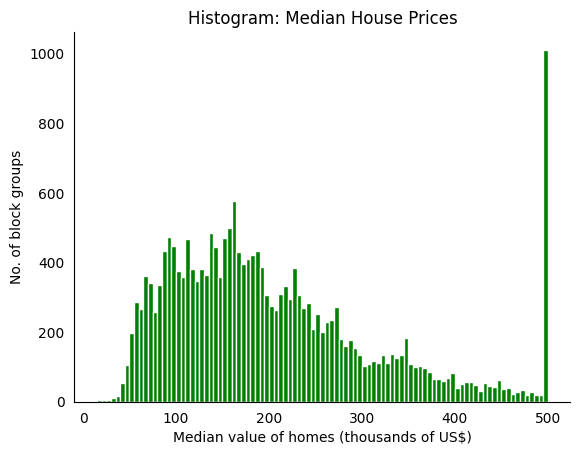

In [123]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

MedHouseVal = cal_df['MedHouseVal']*(10**2)

max_val = MedHouseVal.max()
min_val = MedHouseVal.min()

# plotting
plt.hist(MedHouseVal, bins=int((max_val-min_val)/(5)), facecolor='g', edgecolor='white')
plt.xlabel("Median value of homes (thousands of US$)")
plt.ylabel("No. of block groups")
plt.title("Histogram: Median House Prices")

#polishing
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

### 2.2: Histogram of average occupancy

Now use your histograming skills to create a fine looking histogram of the average number of household members ("AveOccup"). In the same figure, plot the mean and median values of this variable. (Hint: applying a very common transformation to the data might make things easier).


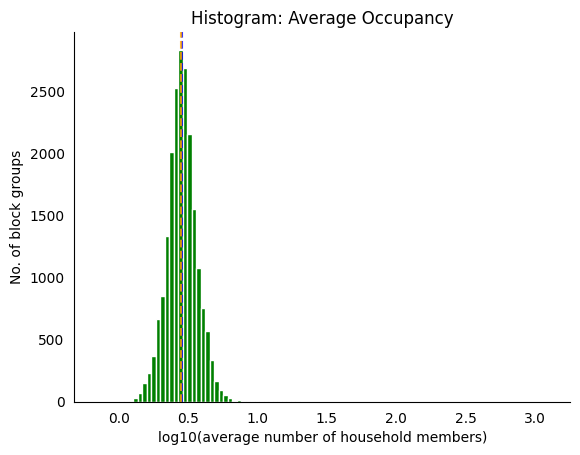

In [149]:
# enter your code here

log10_AveOccup = np.log10(cal_df['AveOccup'])

max_val = log10_AveOccup.max()
min_val = log10_AveOccup.min()

# plotting
plt.hist(log10_AveOccup, bins=100, facecolor='g', edgecolor='white')
plt.xlabel("log10(average number of household members)")
plt.ylabel("No. of block groups")
plt.title("Histogram: Average Occupancy")

#polishing
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.axvline(log10_AveOccup.mean(),linestyle='--',color='b',alpha=0.8)
ax.axvline(log10_AveOccup.median(),linestyle='--',color='orange',alpha=0.8)

### 2.3: Scatter plot of house prices and population

Use matplotlib to create a scatter plot that shows the relationship between the block group median house value (y-axis) and the block group population (x-axis). Properly label your axes, and make sure that your graphic looks polished and professional.

Text(0.5, 1.0, 'Scatter Plot: Median House Value and Population')

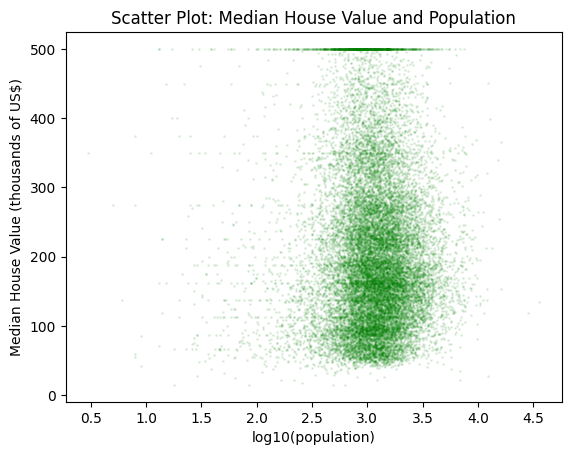

In [137]:
# enter your code here

plt.scatter(np.log10(cal_df["Population"]),cal_df["MedHouseVal"]*(10**2),s=1,alpha=0.1,facecolor='g')
plt.xlabel("log10(population)")
plt.ylabel("Median House Value (thousands of US$)")
plt.title("Scatter Plot: Median House Value and Population")

### 2.4: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between median house value and population in California? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position and compare to your answer in section 1.4.

In [158]:
# enter your code here
from scipy import stats

pearson = round(stats.pearsonr(cal_df["Population"],cal_df["MedHouseVal"])[0],2)
print(f'2.4: The correlation coefficient is {pearson}.')

2.4: The correlation coefficient is -0.02


There doesn't appear to be a strong correlation between median house value and population. The correlation coefficient value is slightly negative and its magnitude is similar to the point estimate obtained in the simple linear regression case in 1.4. As mentioned before, this is an statistial correlation and not necessarily a causal relationship.

### 2.5 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated? Explain these results.

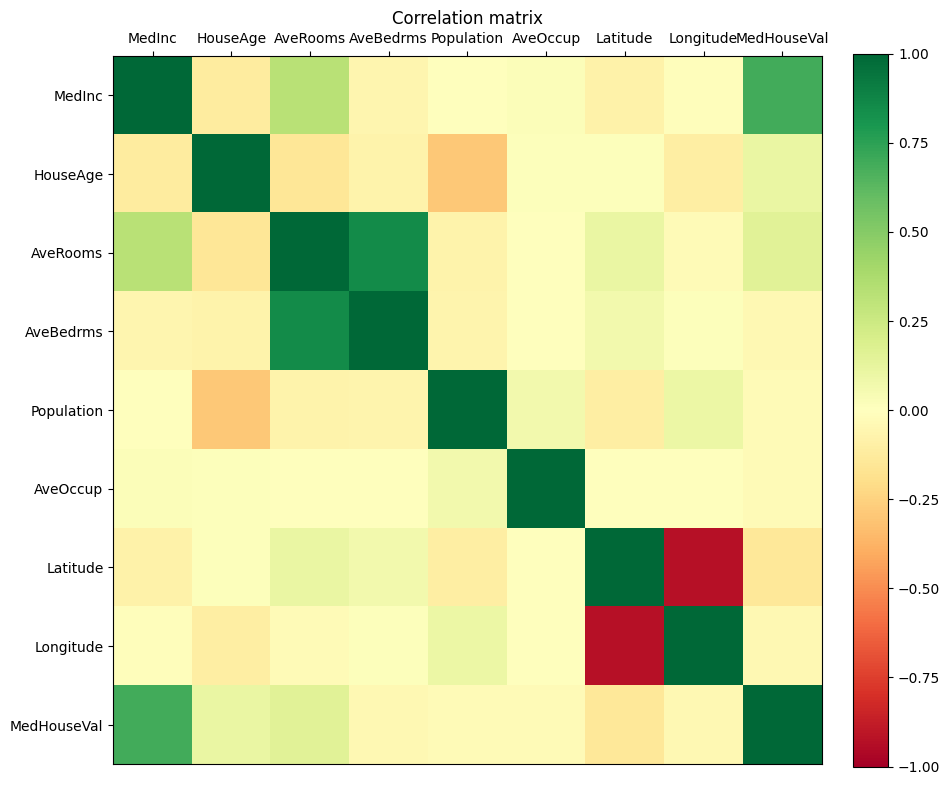

In [161]:
# enter your code here
fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111)

mat = axes.matshow(cal_df.corr(method='pearson'), vmin=-1, vmax=1, cmap=plt.cm.RdYlGn)

fig.colorbar(mat,fraction=0.046, pad=0.04)
axes.set_title('Correlation matrix')
axes.set_xticks(range(len(cal_df.columns)))
axes.set_xticklabels(cal_df.columns)
axes.set_yticks(range(len(cal_df.columns)))
axes.set_yticklabels(cal_df.columns)
axes.xaxis.set_ticks_position('top')
axes.yaxis.set_ticks_position('left')

plt.show()

The average number of rooms and the average number of bedrooms are the most positively correlated. This makes sense, since bedrooms are a particular type of rooms. Latitude and longitude are the most negatively correlated. A negative correlation between these two measurements is to be expected, since California's land area is largely distributed along a slanted axis going from the northwest to the southeast.

### 2.6 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

In [ ]:
# enter your code here